In [80]:
from pyspark.sql import SparkSession
from pyspark.sql import Row
from pyspark.sql.functions import explode, min, max, col, round, hour, minute, count, dayofmonth, month, substring, avg
from pyspark.sql.types import IntegerType
from pyspark.sql.types import TimestampType
import pandas as pd

warehouse_location = 'hdfs://namenode:8020/warehouse'
spark = SparkSession \
    .builder \
    .appName("Python Spark SQL Hive integration example") \
    .config("spark.sql.warehouse.dir", warehouse_location) \
    .config("hive.metastore.uris", "thrift://hive-metastore:9083") \
    .enableHiveSupport() \
    .getOrCreate()


In [3]:
spark.sql(
    """
    DROP TABLE IF EXISTS temperaturetest.temperature_agg
    """
)

DataFrame[]

# Read Json From Spark

In [4]:
df_falhas = spark.read.json('hdfs://namenode:8020//raw/fails/62679310-523a-421d-807f-9b91ba0d670f', multiLine = True)

df_sensores = spark.read.json('hdfs://namenode:8020//raw/sensors/657a2c53-c231-41b2-ae21-a668635d5ed0', multiLine = True)


In [6]:
_df_s = df_sensores.withColumn("results", explode("results")) \
                    .withColumn("sensor_created_at", col("results")["sensor_created_at"].cast("timestamp")) \
                    .withColumn("sensor_event_type", col("results")["sensor_event_type"].cast("string")) \
                    .withColumn("sensor_id_cycle", col("results")["sensor_id_cycle"].cast("integer")) \
                    .withColumn("sensor_ip", col("results")["sensor_ip"].cast("string")) \
                    .withColumn("sensor_unique_id", col("results")["sensor_unique_id"].cast("string")) \
                    .withColumn("sensor_value_humidity", col("results")["sensor_value_humidity"].cast("integer")) \
                    .withColumn("sensor_value_temperature_motor1", col("results")["sensor_value_temperature_motor1"].cast("integer")) \
                    .withColumn("sensor_value_temperature_motor2", col("results")["sensor_value_temperature_motor2"].cast("integer")) \
                    .withColumn("sensor_value_temperature_motor3", col("results")["sensor_value_temperature_motor3"].cast("integer")) \
                    .withColumn("sensor_value_vibrationhz_x", col("results")["sensor_value_vibrationhz_x"].cast("integer")) \
                    .withColumn("sensor_value_vibrationhz_y", col("results")["sensor_value_vibrationhz_y"].cast("integer")) \
                    .withColumn("sensor_value_vibrationhz_z", col("results")["sensor_value_vibrationhz_z"].cast("integer")) \
                    .withColumn("value_noise_dba_motor1", col("results")["value_noise_dba_motor1"].cast("integer")) \
                    .withColumn("value_noise_dba_motor2", col("results")["value_noise_dba_motor2"].cast("integer")) \
                    .withColumn("value_noise_dba_motor3", col("results")["value_noise_dba_motor3"].cast("integer")) \
                    .drop("results") \
                    .orderBy("sensor_created_at")
_sen = _df_s.toPandas()

In [7]:
_df_f = df_falhas.withColumn("results", explode("results")) \
                .withColumn("falha_created_at", col("results")["falha_created_at"].cast("timestamp")) \
                .withColumn("falha_id_falha", col("results")["falha_id_falha"].cast("string")) \
                .withColumn("falha_ip", col("results")["falha_ip"].cast("string")) \
                .withColumn("falha_hostname", col("results")["falha_hostname"].cast("string")) \
                .withColumn("falha_event_type", col("results")["falha_event_type"].cast("string")) \
                .withColumn("falha_tipo_falha", col("results")["falha_tipo_falha"].cast("string")) \
                .withColumn("falha_error_code", col("results")["falha_error_code"].cast("string")) \
                .withColumn("falha_error_description", col("results")["falha_error_description"].cast("string")) \
                .drop("results") \
                .orderBy("falha_created_at")
_fai = _df_f.toPandas()

# Dataframe Sensors

In [8]:
_sen

,sensor_created_at,sensor_event_type,sensor_id_cycle,sensor_ip,sensor_unique_id,sensor_value_humidity,sensor_value_temperature_motor1,sensor_value_temperature_motor2,sensor_value_temperature_motor3,sensor_value_vibrationhz_x,sensor_value_vibrationhz_y,sensor_value_vibrationhz_z,value_noise_dba_motor1,value_noise_dba_motor2,value_noise_dba_motor3
0,2021-11-22 18:53:05,sensor,3,192.168.144.7,af9d2c2e-ab1b-41f6-bd21-1d5fbe6c1e7d,35,13,20,20,7,17,18,27,54,57
1,2021-11-22 18:53:10,sensor,5,192.168.144.7,bf88ab56-9477-4ab9-83e0-28efdf08b631,37,15,23,28,5,12,20,42,61,51
2,2021-11-22 18:53:15,sensor,2,192.168.144.7,061016df-5e35-461f-ae3a-9f9a46bc97b9,29,10,17,28,9,16,11,49,56,42
3,2021-11-22 18:53:20,sensor,2,192.168.144.7,2dbc2f3f-db9c-4351-95b0-c470117f0cf8,54,11,5,12,9,15,11,50,57,53
4,2021-11-22 18:53:25,sensor,1,192.168.144.7,a5abde99-86dc-4ece-8067-2616d4da7a8a,21,13,25,8,9,17,20,49,66,66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12529,2021-11-23 12:17:24,sensor,5,192.168.144.7,f66decc5-1ce2-47a3-9ba7-04e68b34d3b0,20,20,12,26,8,15,19,31,49,27
12530,2021-11-23 12:17:29,sensor,5,192.168.144.7,fb7e7d8c-0a34-4f8d-a486-ca429e22360b,32,20,5,10,4,11,17,40,59,33
12531,2021-11-23 12:17:34,sensor,4,192.168.144.7,1b648c31-cb80-4b03-8474-cb4b2cf2f46d,76,25,15,27,7,17,10,44,53,44
12532,2021-11-23 12:17:39,sensor,2,192.168.144.7,790d17d2-d161-42f5-901c-928136e52c67,79,15,25,21,4,11,19,25,69,31


# Dataframe Fails

In [9]:
_fai

,falha_created_at,falha_id_falha,falha_ip,falha_hostname,falha_event_type,falha_tipo_falha,falha_error_code,falha_error_description
0,2021-11-22 18:53:10,d5ffc69f-be7e-4b67-9357-aa04465b2422,192.168.144.7,df5d6e519504,fail,falha_1,erro_500,Pequena falha
1,2021-11-22 18:53:15,3ad6c16f-69e1-4c19-b194-400e778dfcab,192.168.144.7,df5d6e519504,fail,falha_2,erro_500,Falha Geral
2,2021-11-22 18:53:20,a720260d-43fb-4e9e-ae83-8033d1fb65f0,192.168.144.7,df5d6e519504,fail,falha_3,erro_500,Falha Crítica
3,2021-11-22 19:53:10,c8e7c86a-77bc-4cb9-8381-a200b73332c6,192.168.144.7,df5d6e519504,fail,falha_1,erro_500,Pequena falha
4,2021-11-22 20:53:10,fc93d60c-34f3-4598-a7bc-91bcd9ad5842,192.168.144.7,df5d6e519504,fail,falha_1,erro_500,Pequena falha
5,2021-11-22 20:58:15,a8936b52-c30a-4917-83bb-e7b91db3c52f,192.168.144.7,df5d6e519504,fail,falha_2,erro_500,Falha Geral
6,2021-11-22 21:53:10,ac1b4242-101f-4b24-a9b0-40013bbceb9c,192.168.144.7,df5d6e519504,fail,falha_1,erro_500,Pequena falha
7,2021-11-22 22:53:10,0be345ed-77f7-4f2f-abe6-a19d04b0aaa5,192.168.144.7,df5d6e519504,fail,falha_1,erro_500,Pequena falha
8,2021-11-22 23:03:15,36117422-bd6f-4d39-b797-ac18ed77c9f3,192.168.144.7,df5d6e519504,fail,falha_2,erro_500,Falha Geral
9,2021-11-22 23:53:10,4af4c34e-804d-4f83-b7e5-45a3bd13d3d6,192.168.144.7,df5d6e519504,fail,falha_1,erro_500,Pequena falha


In [11]:
_fails = _fai[["falha_created_at", "falha_tipo_falha", "falha_error_description"]]
_fails.rename(columns = {'falha_created_at':'sensor_created_at'}, inplace = True)

# Merge Dataframe Sensors and Fails

In [12]:
import pandas as pd
test = pd.merge_asof(_sen, _fails, on="sensor_created_at", tolerance=pd.Timedelta("4s"))

In [13]:
test["falha_error_description"].value_counts()

Pequena falha    18
Falha Geral       9
Falha Crítica     4
Name: falha_error_description, dtype: int64

In [14]:
df_test = test.copy()
df_test = test.fillna('sem_falha')

In [15]:
df_test

,sensor_created_at,sensor_event_type,sensor_id_cycle,sensor_ip,sensor_unique_id,sensor_value_humidity,sensor_value_temperature_motor1,sensor_value_temperature_motor2,sensor_value_temperature_motor3,sensor_value_vibrationhz_x,sensor_value_vibrationhz_y,sensor_value_vibrationhz_z,value_noise_dba_motor1,value_noise_dba_motor2,value_noise_dba_motor3,falha_tipo_falha,falha_error_description
0,2021-11-22 18:53:05,sensor,3,192.168.144.7,af9d2c2e-ab1b-41f6-bd21-1d5fbe6c1e7d,35,13,20,20,7,17,18,27,54,57,sem_falha,sem_falha
1,2021-11-22 18:53:10,sensor,5,192.168.144.7,bf88ab56-9477-4ab9-83e0-28efdf08b631,37,15,23,28,5,12,20,42,61,51,falha_1,Pequena falha
2,2021-11-22 18:53:15,sensor,2,192.168.144.7,061016df-5e35-461f-ae3a-9f9a46bc97b9,29,10,17,28,9,16,11,49,56,42,falha_2,Falha Geral
3,2021-11-22 18:53:20,sensor,2,192.168.144.7,2dbc2f3f-db9c-4351-95b0-c470117f0cf8,54,11,5,12,9,15,11,50,57,53,falha_3,Falha Crítica
4,2021-11-22 18:53:25,sensor,1,192.168.144.7,a5abde99-86dc-4ece-8067-2616d4da7a8a,21,13,25,8,9,17,20,49,66,66,sem_falha,sem_falha
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12529,2021-11-23 12:17:24,sensor,5,192.168.144.7,f66decc5-1ce2-47a3-9ba7-04e68b34d3b0,20,20,12,26,8,15,19,31,49,27,sem_falha,sem_falha
12530,2021-11-23 12:17:29,sensor,5,192.168.144.7,fb7e7d8c-0a34-4f8d-a486-ca429e22360b,32,20,5,10,4,11,17,40,59,33,sem_falha,sem_falha
12531,2021-11-23 12:17:34,sensor,4,192.168.144.7,1b648c31-cb80-4b03-8474-cb4b2cf2f46d,76,25,15,27,7,17,10,44,53,44,sem_falha,sem_falha
12532,2021-11-23 12:17:39,sensor,2,192.168.144.7,790d17d2-d161-42f5-901c-928136e52c67,79,15,25,21,4,11,19,25,69,31,sem_falha,sem_falha


# AGG by Minute

In [23]:
dfs2 = _df_s.withColumn("sensor_dayOfMonth", dayofmonth("sensor_created_at")) \
             .withColumn("sensor_month", month("sensor_created_at")) \
             .withColumn("sensor_hour", substring("sensor_created_at", 11, 13)) \
             .withColumn("sensor_date", substring("sensor_created_at", 0, 10)) \
             .withColumn("sensor_datehhmm", substring("sensor_created_at", 0, 16).cast(TimestampType())) \
              .orderBy("sensor_datehhmm")

In [24]:
dfs2.toPandas()

,sensor_created_at,sensor_event_type,sensor_id_cycle,sensor_ip,sensor_unique_id,sensor_value_humidity,sensor_value_temperature_motor1,sensor_value_temperature_motor2,sensor_value_temperature_motor3,sensor_value_vibrationhz_x,sensor_value_vibrationhz_y,sensor_value_vibrationhz_z,value_noise_dba_motor1,value_noise_dba_motor2,value_noise_dba_motor3,sensor_dayOfMonth,sensor_month,sensor_hour,sensor_date,sensor_datehhmm
0,2021-11-22 18:53:05,sensor,3,192.168.144.7,af9d2c2e-ab1b-41f6-bd21-1d5fbe6c1e7d,35,13,20,20,7,17,18,27,54,57,22,11,18:53:05,2021-11-22,2021-11-22 18:53:00
1,2021-11-22 18:53:25,sensor,1,192.168.144.7,a5abde99-86dc-4ece-8067-2616d4da7a8a,21,13,25,8,9,17,20,49,66,66,22,11,18:53:25,2021-11-22,2021-11-22 18:53:00
2,2021-11-22 18:53:35,sensor,5,192.168.144.7,1ecdf194-2c3b-4a7b-817a-1efb9c6803fd,49,18,18,15,11,14,18,30,22,30,22,11,18:53:35,2021-11-22,2021-11-22 18:53:00
3,2021-11-22 18:53:45,sensor,3,192.168.144.7,059cd749-91bc-4272-87ca-9b02a50cec17,51,1,29,14,11,12,16,38,48,67,22,11,18:53:45,2021-11-22,2021-11-22 18:53:00
4,2021-11-22 18:53:50,sensor,4,192.168.144.7,b8e17a05-c3c5-41a0-b5f1-9af46e6d14f9,44,13,30,21,5,18,20,35,30,63,22,11,18:53:50,2021-11-22,2021-11-22 18:53:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12529,2021-11-23 12:17:34,sensor,4,192.168.144.7,1b648c31-cb80-4b03-8474-cb4b2cf2f46d,76,25,15,27,7,17,10,44,53,44,23,11,12:17:34,2021-11-23,2021-11-23 12:17:00
12530,2021-11-23 12:17:14,sensor,4,192.168.144.7,9e3d0e46-482d-49f0-a600-7c1391dc2cae,38,8,5,19,5,13,15,23,35,42,23,11,12:17:14,2021-11-23,2021-11-23 12:17:00
12531,2021-11-23 12:17:04,sensor,3,192.168.144.7,d46a79a3-0ce2-4afb-9eca-010b2bb04634,15,14,29,5,12,15,14,48,66,54,23,11,12:17:04,2021-11-23,2021-11-23 12:17:00
12532,2021-11-23 12:17:44,sensor,5,192.168.144.7,3094c3cc-cb8f-41e9-9bb2-982a9d396958,73,19,23,24,13,18,15,21,26,26,23,11,12:17:44,2021-11-23,2021-11-23 12:17:00


In [25]:
dfs2

DataFrame[sensor_created_at: timestamp, sensor_event_type: string, sensor_id_cycle: int, sensor_ip: string, sensor_unique_id: string, sensor_value_humidity: int, sensor_value_temperature_motor1: int, sensor_value_temperature_motor2: int, sensor_value_temperature_motor3: int, sensor_value_vibrationhz_x: int, sensor_value_vibrationhz_y: int, sensor_value_vibrationhz_z: int, value_noise_dba_motor1: int, value_noise_dba_motor2: int, value_noise_dba_motor3: int, sensor_dayOfMonth: int, sensor_month: int, sensor_hour: string, sensor_date: string, sensor_datehhmm: timestamp]

In [18]:
dfs2.describe()

,sensor_id_cycle,sensor_value_humidity,sensor_value_temperature_motor1,sensor_value_temperature_motor2,sensor_value_temperature_motor3,sensor_value_vibrationhz_x,sensor_value_vibrationhz_y,sensor_value_vibrationhz_z,value_noise_dba_motor1,value_noise_dba_motor2,value_noise_dba_motor3,sensor_dayOfMonth,sensor_month
count,12534.000000,12534.000000,12534.000000,12534.000000,12534.000000,12534.000000,12534.000000,12534.000000,12534.000000,12534.000000,12534.000000,12534.000000,12534.0
mean,2.980693,49.189245,13.087841,18.475906,19.316659,7.489947,15.483565,15.527046,44.424286,44.456438,44.428754,22.706159,11.0
std,1.409561,20.082546,7.162365,8.060027,8.635551,3.454232,3.464725,3.455434,14.432491,14.434791,14.461922,0.455538,0.0
min,1.000000,15.000000,1.000000,5.000000,5.000000,2.000000,10.000000,10.000000,20.000000,20.000000,20.000000,22.000000,11.0
25%,2.000000,32.000000,7.000000,12.000000,12.000000,5.000000,12.000000,13.000000,32.000000,32.000000,32.000000,22.000000,11.0
50%,3.000000,49.000000,13.000000,18.000000,19.000000,7.000000,15.000000,15.000000,44.000000,44.000000,44.000000,23.000000,11.0
75%,4.000000,67.000000,19.000000,25.000000,27.000000,11.000000,18.000000,19.000000,57.000000,57.000000,57.000000,23.000000,11.0
max,5.000000,84.000000,25.000000,32.000000,34.000000,13.000000,21.000000,21.000000,69.000000,69.000000,69.000000,23.000000,11.0


In [19]:
dfs2.dtypes

sensor_created_at                  datetime64[ns]
sensor_event_type                          object
sensor_id_cycle                             int32
sensor_ip                                  object
sensor_unique_id                           object
sensor_value_humidity                       int32
sensor_value_temperature_motor1             int32
sensor_value_temperature_motor2             int32
sensor_value_temperature_motor3             int32
sensor_value_vibrationhz_x                  int32
sensor_value_vibrationhz_y                  int32
sensor_value_vibrationhz_z                  int32
value_noise_dba_motor1                      int32
value_noise_dba_motor2                      int32
value_noise_dba_motor3                      int32
sensor_dayOfMonth                           int32
sensor_month                                int32
sensor_hour                                object
sensor_date                                object
sensor_datehhmm                    datetime64[ns]


In [81]:
import pandas as pd
import numpy as np

In [20]:
dfs2.columns.values

array(['sensor_created_at', 'sensor_event_type', 'sensor_id_cycle',
       'sensor_ip', 'sensor_unique_id', 'sensor_value_humidity',
       'sensor_value_temperature_motor1',
       'sensor_value_temperature_motor2',
       'sensor_value_temperature_motor3', 'sensor_value_vibrationhz_x',
       'sensor_value_vibrationhz_y', 'sensor_value_vibrationhz_z',
       'value_noise_dba_motor1', 'value_noise_dba_motor2',
       'value_noise_dba_motor3', 'sensor_dayOfMonth', 'sensor_month',
       'sensor_hour', 'sensor_date', 'sensor_datehhmm'], dtype=object)

In [21]:
dfs2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12534 entries, 0 to 12533
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   sensor_created_at                12534 non-null  datetime64[ns]
 1   sensor_event_type                12534 non-null  object        
 2   sensor_id_cycle                  12534 non-null  int32         
 3   sensor_ip                        12534 non-null  object        
 4   sensor_unique_id                 12534 non-null  object        
 5   sensor_value_humidity            12534 non-null  int32         
 6   sensor_value_temperature_motor1  12534 non-null  int32         
 7   sensor_value_temperature_motor2  12534 non-null  int32         
 8   sensor_value_temperature_motor3  12534 non-null  int32         
 9   sensor_value_vibrationhz_x       12534 non-null  int32         
 10  sensor_value_vibrationhz_y       12534 non-null  int32    

# Create Dataframe with Avg, Max, Min

In [55]:
df3 = dfs2.groupBy("sensor_datehhmm", "sensor_ip") \
     .agg( \
     min("sensor_value_humidity").alias('min_humidity'), \
     max("sensor_value_humidity").alias('max_humidity'), \
     round(avg("sensor_value_humidity"), 2).alias('avg_humidity'), \
     min("sensor_value_temperature_motor1").alias('min_temp_motor1'), \
     max("sensor_value_temperature_motor1").alias('max_temp_motor1'), \
     round(avg("sensor_value_temperature_motor1"), 2).alias('avg_temp_motor1'), \
     min("sensor_value_temperature_motor2").alias('min_temp_motor2'), \
     max("sensor_value_temperature_motor2").alias('max_temp_motor2'), \
     round(avg("sensor_value_temperature_motor2"), 2).alias('avg_temp_motor2'), \
     min("sensor_value_temperature_motor3").alias('min_temp_motor3'), \
     max("sensor_value_temperature_motor3").alias('max_temp_motor3'), \
     round(avg("sensor_value_temperature_motor3"), 2).alias('avg_temp_motor3'), \
     min("sensor_value_vibrationhz_x").alias('min_vibrationhz_x'), \
     max("sensor_value_vibrationhz_x").alias('max_vibrationhz_x'), \
     round(avg("sensor_value_vibrationhz_x"), 2).alias('avg_vibrationhz_x'), \
     min("sensor_value_vibrationhz_y").alias('min_vibrationhz_y'), \
     max("sensor_value_vibrationhz_y").alias('max_vibrationhz_y'), \
     round(avg("sensor_value_vibrationhz_y"), 2).alias('avg_vibrationhz_y'), \
     min("sensor_value_vibrationhz_z").alias('min_vibrationhz_z'), \
     max("sensor_value_vibrationhz_z").alias('max_vibrationhz_z'), \
     round(avg("sensor_value_vibrationhz_z"), 2).alias('avg_vibrationhz_z'), \
     min("value_noise_dba_motor1").alias('min_noise_dba_motor1'), \
     max("value_noise_dba_motor1").alias('max_noise_dba_motor1'), \
     round(avg("value_noise_dba_motor1"), 2).alias('avg_noise_dba_motor1'), \
     min("value_noise_dba_motor2").alias('min_noise_dba_motor2'), \
     max("value_noise_dba_motor2").alias('max_noise_dba_motor2'), \
     round(avg("value_noise_dba_motor2"), 2).alias('avg_noise_dba_motor2'), \
     min("value_noise_dba_motor3").alias('min_noise_dba_motor3'), \
     max("value_noise_dba_motor3").alias('max_noise_dba_motor3'), \
     round(avg("value_noise_dba_motor3"), 2).alias('avg_noise_dba_motor3'), \
     count(colName).alias("temp_count_hour")) \
     .orderBy("sensor_datehhmm").toPandas()               

In [56]:
df3

,sensor_datehhmm,sensor_ip,min_humidity,max_humidity,avg_humidity,min_temp_motor1,max_temp_motor1,avg_temp_motor1,min_temp_motor2,max_temp_motor2,...,min_noise_dba_motor1,max_noise_dba_motor1,avg_noise_dba_motor1,min_noise_dba_motor2,max_noise_dba_motor2,avg_noise_dba_motor2,min_noise_dba_motor3,max_noise_dba_motor3,avg_noise_dba_motor3,temp_count_hour
0,2021-11-22 18:53:00,192.168.144.7,21,67,42.64,1,20,11.45,5,30,...,24,65,42.82,22,66,47.27,30,69,55.00,11
1,2021-11-22 18:54:00,192.168.144.7,32,83,52.58,1,25,15.92,5,31,...,23,69,46.50,21,67,42.75,28,60,45.17,12
2,2021-11-22 18:55:00,192.168.144.7,19,78,49.50,1,25,13.92,5,31,...,21,67,42.42,25,67,45.17,26,64,38.08,12
3,2021-11-22 18:56:00,192.168.144.7,16,79,53.33,3,21,12.83,6,28,...,21,65,44.67,24,68,48.42,21,69,42.92,12
4,2021-11-22 18:57:00,192.168.144.7,15,82,54.75,2,25,12.50,5,30,...,20,67,47.25,20,66,37.33,21,69,47.67,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1040,2021-11-23 12:13:00,192.168.144.7,16,82,53.17,2,25,18.00,5,31,...,22,69,42.42,39,67,54.17,24,64,43.33,12
1041,2021-11-23 12:14:00,192.168.144.7,24,80,53.75,2,25,15.67,6,32,...,20,68,44.58,21,66,45.83,29,69,51.42,12
1042,2021-11-23 12:15:00,192.168.144.7,15,76,40.58,2,25,10.33,5,32,...,20,65,42.58,23,69,47.50,20,69,49.00,12
1043,2021-11-23 12:16:00,192.168.144.7,15,81,41.42,1,25,10.50,5,25,...,25,68,46.58,24,69,45.83,24,61,37.92,12


In [66]:
pip install plotly

     |████████████████████████████████| 25.3 MB 305 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [78]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

<AxesSubplot:xlabel='sensor_datehhmm'>

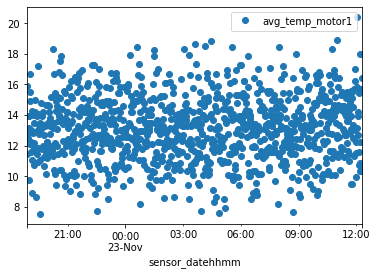

In [59]:
df3.plot(x='sensor_datehhmm', y='avg_temp_motor1', style='o')

In [84]:
import seaborn as sns

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



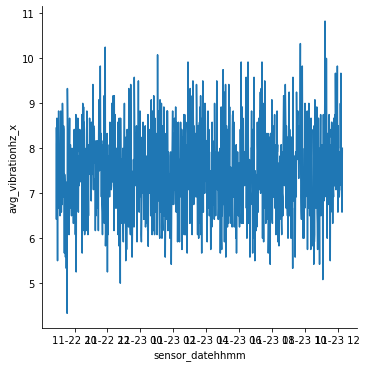

In [110]:
sns.relplot('sensor_datehhmm','avg_vibrationhz_x',data=df3,kind='line')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



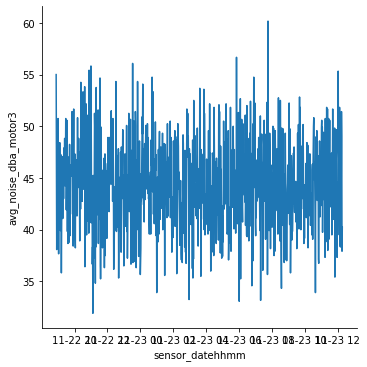

In [96]:
sns.relplot('sensor_datehhmm','avg_noise_dba_motor3',data=df3,kind='line')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



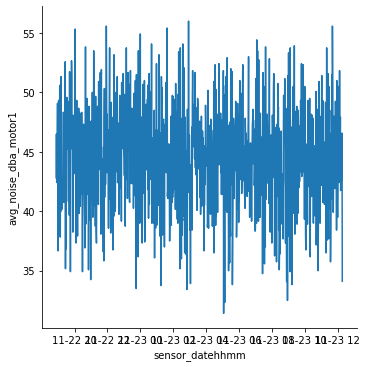

In [108]:
sns.relplot('sensor_datehhmm','avg_noise_dba_motor1',data=df3,kind='line')

In [99]:
dfs4= _df_s.withColumn("sensor_dayOfMonth", dayofmonth("sensor_created_at")) \
             .withColumn("sensor_month", month("sensor_created_at")) \
             .withColumn("sensor_hour", substring("sensor_created_at", 11, 13)) \
             .withColumn("sensor_date", substring("sensor_created_at", 0, 10)) \
             .withColumn("sensor_datehhmm", substring("sensor_created_at", 0, 13).cast(TimestampType())) \
              .orderBy("sensor_datehhmm")

In [101]:
dfs4.toPandas()

,sensor_created_at,sensor_event_type,sensor_id_cycle,sensor_ip,sensor_unique_id,sensor_value_humidity,sensor_value_temperature_motor1,sensor_value_temperature_motor2,sensor_value_temperature_motor3,sensor_value_vibrationhz_x,sensor_value_vibrationhz_y,sensor_value_vibrationhz_z,value_noise_dba_motor1,value_noise_dba_motor2,value_noise_dba_motor3,sensor_dayOfMonth,sensor_month,sensor_hour,sensor_date,sensor_datehhmm
0,2021-11-22 18:59:50,sensor,2,192.168.144.7,55aa89a1-493a-4ddb-827f-1de1511d56c2,77,12,19,23,5,21,17,30,38,26,22,11,18:59:50,2021-11-22,2021-11-22 18:00:00
1,2021-11-22 18:55:25,sensor,2,192.168.144.7,a4e691f8-29f0-4301-bd3f-ca8c8c7c42cf,41,19,26,34,2,13,19,65,56,42,22,11,18:55:25,2021-11-22,2021-11-22 18:00:00
2,2021-11-22 18:54:15,sensor,4,192.168.144.7,7f7a5296-7049-4d1d-ad94-b4c089eb3a7a,50,22,22,34,8,18,14,23,27,29,22,11,18:54:15,2021-11-22,2021-11-22 18:00:00
3,2021-11-22 18:59:45,sensor,2,192.168.144.7,d68e14bb-6b5c-4786-9d1a-153c81120200,60,12,10,17,11,14,18,56,41,23,22,11,18:59:45,2021-11-22,2021-11-22 18:00:00
4,2021-11-22 18:53:05,sensor,3,192.168.144.7,af9d2c2e-ab1b-41f6-bd21-1d5fbe6c1e7d,35,13,20,20,7,17,18,27,54,57,22,11,18:53:05,2021-11-22,2021-11-22 18:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12529,2021-11-23 12:03:59,sensor,1,192.168.144.7,4e36bf64-5471-4ef7-b842-0f49518f6bd2,75,21,15,6,2,19,12,44,47,30,23,11,12:03:59,2021-11-23,2021-11-23 12:00:00
12530,2021-11-23 12:11:44,sensor,1,192.168.144.7,932e1d2f-44a6-4e55-859e-1f79070629c3,66,21,32,8,13,16,18,39,67,30,23,11,12:11:44,2021-11-23,2021-11-23 12:00:00
12531,2021-11-23 12:16:04,sensor,1,192.168.144.7,628c510b-509f-412b-8c36-4ecc43492129,27,18,14,18,13,10,10,34,27,29,23,11,12:16:04,2021-11-23,2021-11-23 12:00:00
12532,2021-11-23 12:00:24,sensor,3,192.168.144.7,55509303-ff25-4d7d-a9d6-024e3070ea2e,78,22,26,23,7,13,18,25,57,49,23,11,12:00:24,2021-11-23,2021-11-23 12:00:00


In [103]:
df5 = dfs4.groupBy("sensor_datehhmm", "sensor_ip") \
     .agg( \
     min("sensor_value_humidity").alias('min_humidity'), \
     max("sensor_value_humidity").alias('max_humidity'), \
     round(avg("sensor_value_humidity"), 2).alias('avg_humidity'), \
     min("sensor_value_temperature_motor1").alias('min_temp_motor1'), \
     max("sensor_value_temperature_motor1").alias('max_temp_motor1'), \
     round(avg("sensor_value_temperature_motor1"), 2).alias('avg_temp_motor1'), \
     min("sensor_value_temperature_motor2").alias('min_temp_motor2'), \
     max("sensor_value_temperature_motor2").alias('max_temp_motor2'), \
     round(avg("sensor_value_temperature_motor2"), 2).alias('avg_temp_motor2'), \
     min("sensor_value_temperature_motor3").alias('min_temp_motor3'), \
     max("sensor_value_temperature_motor3").alias('max_temp_motor3'), \
     round(avg("sensor_value_temperature_motor3"), 2).alias('avg_temp_motor3'), \
     min("sensor_value_vibrationhz_x").alias('min_vibrationhz_x'), \
     max("sensor_value_vibrationhz_x").alias('max_vibrationhz_x'), \
     round(avg("sensor_value_vibrationhz_x"), 2).alias('avg_vibrationhz_x'), \
     min("sensor_value_vibrationhz_y").alias('min_vibrationhz_y'), \
     max("sensor_value_vibrationhz_y").alias('max_vibrationhz_y'), \
     round(avg("sensor_value_vibrationhz_y"), 2).alias('avg_vibrationhz_y'), \
     min("sensor_value_vibrationhz_z").alias('min_vibrationhz_z'), \
     max("sensor_value_vibrationhz_z").alias('max_vibrationhz_z'), \
     round(avg("sensor_value_vibrationhz_z"), 2).alias('avg_vibrationhz_z'), \
     min("value_noise_dba_motor1").alias('min_noise_dba_motor1'), \
     max("value_noise_dba_motor1").alias('max_noise_dba_motor1'), \
     round(avg("value_noise_dba_motor1"), 2).alias('avg_noise_dba_motor1'), \
     min("value_noise_dba_motor2").alias('min_noise_dba_motor2'), \
     max("value_noise_dba_motor2").alias('max_noise_dba_motor2'), \
     round(avg("value_noise_dba_motor2"), 2).alias('avg_noise_dba_motor2'), \
     min("value_noise_dba_motor3").alias('min_noise_dba_motor3'), \
     max("value_noise_dba_motor3").alias('max_noise_dba_motor3'), \
     round(avg("value_noise_dba_motor3"), 2).alias('avg_noise_dba_motor3'), \
     count(colName).alias("temp_count_hour")) \
     .orderBy("sensor_datehhmm").toPandas()               

In [104]:
df5

,sensor_datehhmm,sensor_ip,min_humidity,max_humidity,avg_humidity,min_temp_motor1,max_temp_motor1,avg_temp_motor1,min_temp_motor2,max_temp_motor2,...,min_noise_dba_motor1,max_noise_dba_motor1,avg_noise_dba_motor1,min_noise_dba_motor2,max_noise_dba_motor2,avg_noise_dba_motor2,min_noise_dba_motor3,max_noise_dba_motor3,avg_noise_dba_motor3,temp_count_hour
0,2021-11-22 18:00:00,192.168.144.7,15,83,50.30,1,25,12.81,5,31,...,20,69,45.41,20,69,43.96,20,69,44.72,83
1,2021-11-22 19:00:00,192.168.144.7,15,84,48.92,1,25,12.67,5,32,...,20,69,44.93,20,69,44.57,20,69,44.58,720
2,2021-11-22 20:00:00,192.168.144.7,15,84,49.39,1,25,13.37,5,32,...,20,69,43.56,20,69,44.51,20,69,45.79,720
3,2021-11-22 21:00:00,192.168.144.7,15,84,48.88,1,25,13.10,5,32,...,20,69,44.82,20,69,44.03,20,69,43.63,720
4,2021-11-22 22:00:00,192.168.144.7,15,84,49.19,1,25,13.19,5,32,...,20,69,45.08,20,69,43.90,20,69,44.52,720
5,2021-11-22 23:00:00,192.168.144.7,15,84,50.57,1,25,12.95,5,32,...,20,69,44.86,20,69,43.84,20,69,43.95,720
6,2021-11-23 00:00:00,192.168.144.7,15,84,49.04,1,25,13.56,5,32,...,20,69,44.81,20,69,44.92,20,69,45.26,719
7,2021-11-23 01:00:00,192.168.144.7,15,84,49.45,1,25,12.92,5,32,...,20,69,44.18,20,69,45.13,20,69,44.20,720
8,2021-11-23 02:00:00,192.168.144.7,15,84,48.26,1,25,12.78,5,32,...,20,69,43.93,20,69,44.59,20,69,43.81,720
9,2021-11-23 03:00:00,192.168.144.7,15,84,49.05,1,25,12.96,5,32,...,20,69,44.64,20,69,43.59,20,69,44.55,720


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



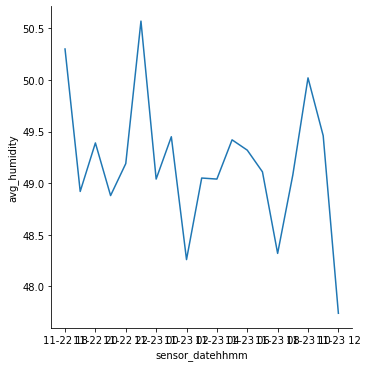

In [105]:
sns.relplot('sensor_datehhmm','avg_humidity',data=df5,kind='line')

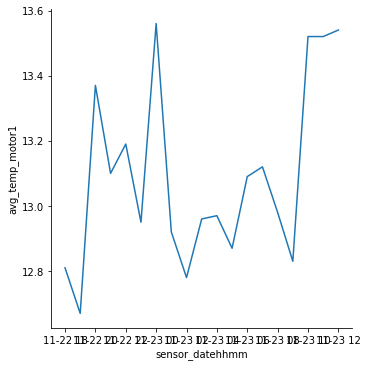

In [107]:
sns.relplot('sensor_datehhmm','avg_temp_motor1',data=df5,kind='line')

# SARIMAX

In [48]:
data = df3.copy()
data2 = df3.copy()

In [52]:
data = df3.copy()
data.index = df3['sensor_datehhmm']
data.drop(columns=['sensor_datehhmm', 'sensor_ip'],inplace=True)
data.head()

,temp_min_hour,temp_max_hour,temp_avg_hour,temp_min_hour1,temp_max_hour1,temp_avg_hour1,temp_count_hour
sensor_datehhmm,,,,,,,
2021-11-22 18:53:00,21,67,42.64,1,20,11.45,11
2021-11-22 18:54:00,32,83,52.58,1,25,15.92,12
2021-11-22 18:55:00,19,78,49.50,1,25,13.92,12
2021-11-22 18:56:00,16,79,53.33,3,21,12.83,12
2021-11-22 18:57:00,15,82,54.75,2,25,12.50,12


<AxesSubplot:xlabel='sensor_datehhmm'>

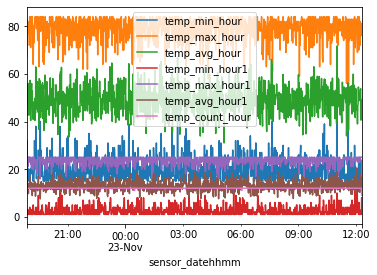

In [53]:
data.plot()